In [7]:
#Import packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import pickle

%matplotlib notebook

In [5]:
main_paths = [
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220815\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220816\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220817\processed",
    
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230123\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230124\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230125\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230126\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_644864_20230130\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_644864_20230131\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_644864_20230201\processed", 
    r"\\allen\programs\mindscope\workgroups\np-exp\PilotEphys\Task 2 pilot\DRpilot_644864_20230202\processed",
#     r"\\allen\programs\mindscope\workgroups\np-exp\PilotEphys\Task 2 pilot\DRpilot_644866_20230207\processed", 
    r"Y:\DRpilot_644866_20230208\processed",
    r"Y:\DRpilot_644866_20230209\processed",
    r"Y:\DRpilot_644866_20230210\processed",
    r"Y:\DRpilot_644867_20230220\processed",
    r"Y:\DRpilot_644867_20230221\processed",
    r"Y:\DRpilot_644867_20230222\processed",
    r"Y:\DRpilot_644867_20230223\processed",
    r"Y:\DRpilot_649943_20230213\processed", 
    r"Y:\DRpilot_649943_20230214\processed",
    r"Y:\DRpilot_649943_20230215\processed",
    r"Y:\DRpilot_649943_20230216\processed",   
]


In [8]:
loadpath=r'C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR decoding results\use_video\multi_ROI_many_200ms'

svc_results_face={}
decoder_results=os.listdir(loadpath)

for ii,ff in enumerate(decoder_results):
    with open(os.path.join(loadpath,ff),'rb') as handle:
        svc_results_face[ii]=pickle.load(handle)
    print(ff)

626791_1multi_ROI_many_200ms.pkl
626791_2multi_ROI_many_200ms.pkl
626791_3multi_ROI_many_200ms.pkl
636766_1multi_ROI_many_200ms.pkl
636766_2multi_ROI_many_200ms.pkl
636766_3multi_ROI_many_200ms.pkl
636766_4multi_ROI_many_200ms.pkl
644864_1multi_ROI_many_200ms.pkl
644864_2multi_ROI_many_200ms.pkl
644864_3multi_ROI_many_200ms.pkl
644864_4multi_ROI_many_200ms.pkl
644866_2multi_ROI_many_200ms.pkl
644866_3multi_ROI_many_200ms.pkl
644866_4multi_ROI_many_200ms.pkl
644867_1multi_ROI_many_200ms.pkl
644867_2multi_ROI_many_200ms.pkl
644867_3multi_ROI_many_200ms.pkl
644867_4multi_ROI_many_200ms.pkl
649943_1multi_ROI_many_200ms.pkl
649943_2multi_ROI_many_200ms.pkl
649943_3multi_ROI_many_200ms.pkl
649943_4multi_ROI_many_200ms.pkl


In [26]:
svc_results_face[0][0]['block_ids'][0][0][0]['trial_sel_idx']

(479,)

<IPython.core.display.Javascript object>


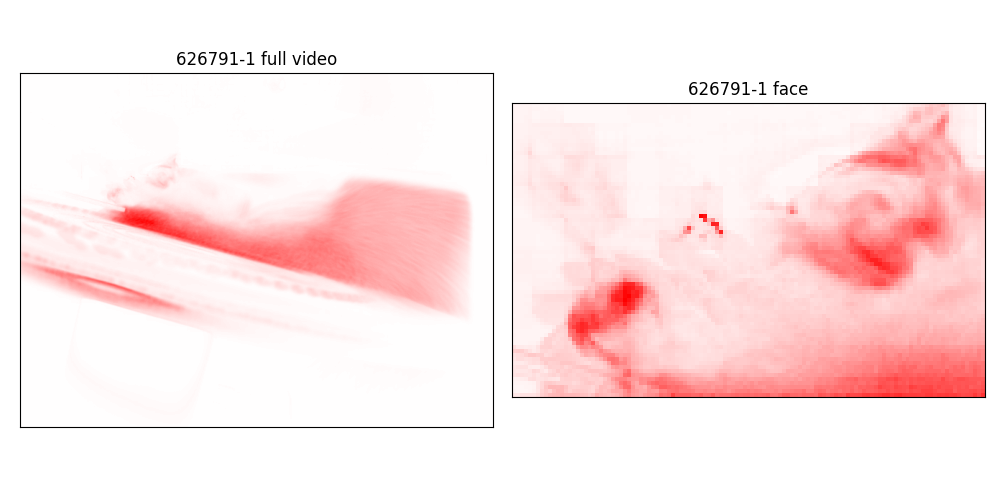

<IPython.core.display.Javascript object>


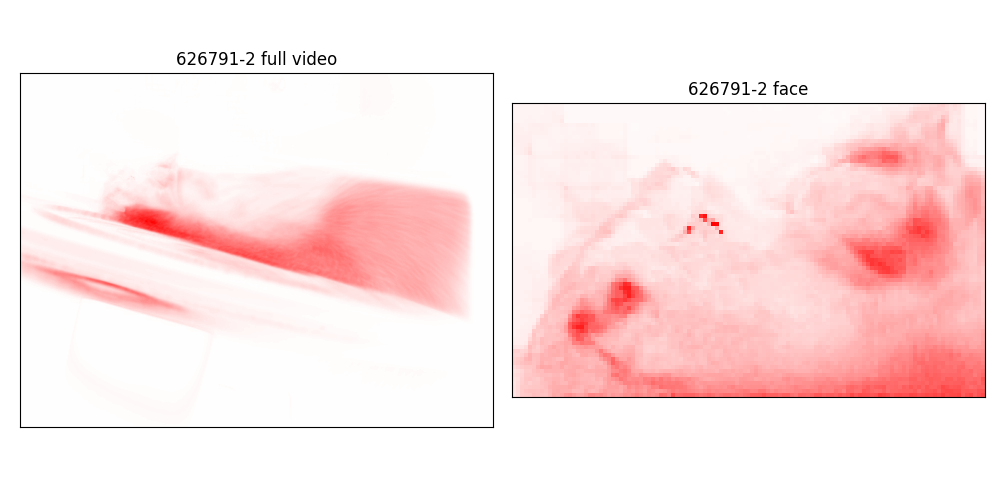

<IPython.core.display.Javascript object>


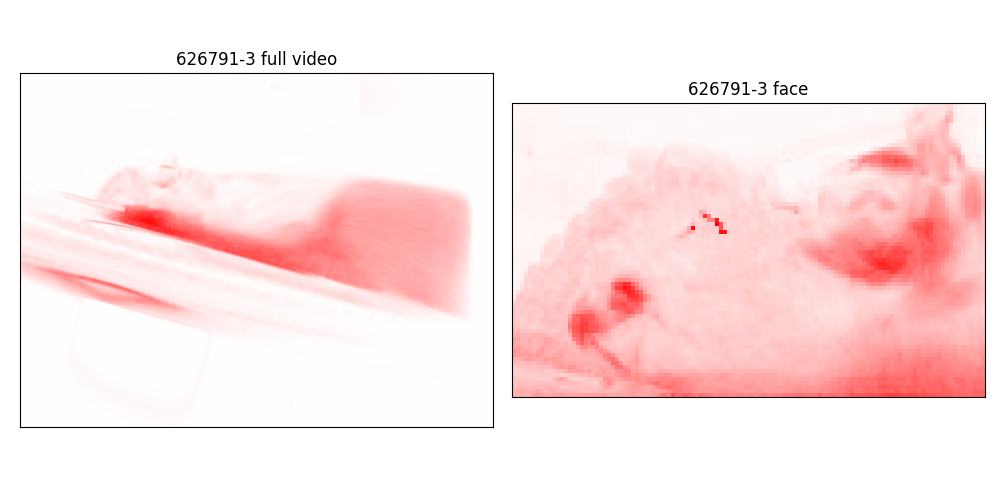

<IPython.core.display.Javascript object>


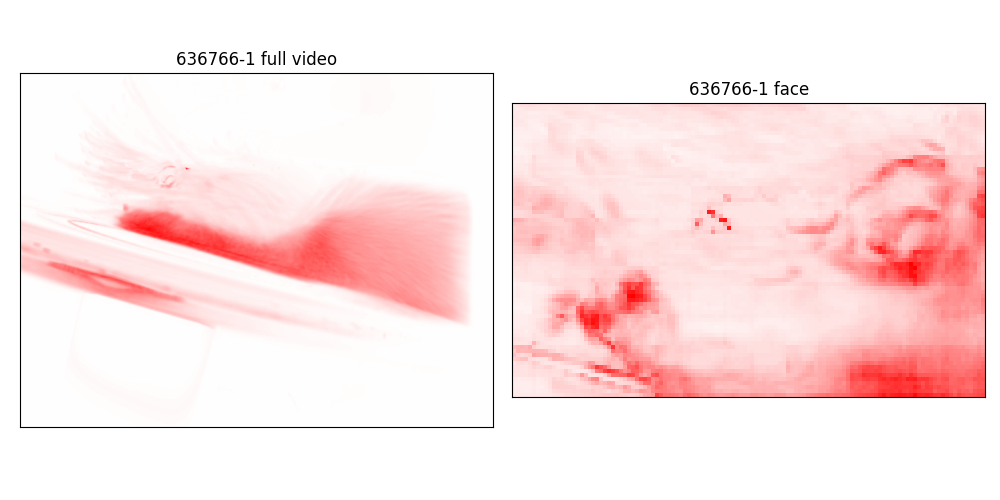

<IPython.core.display.Javascript object>


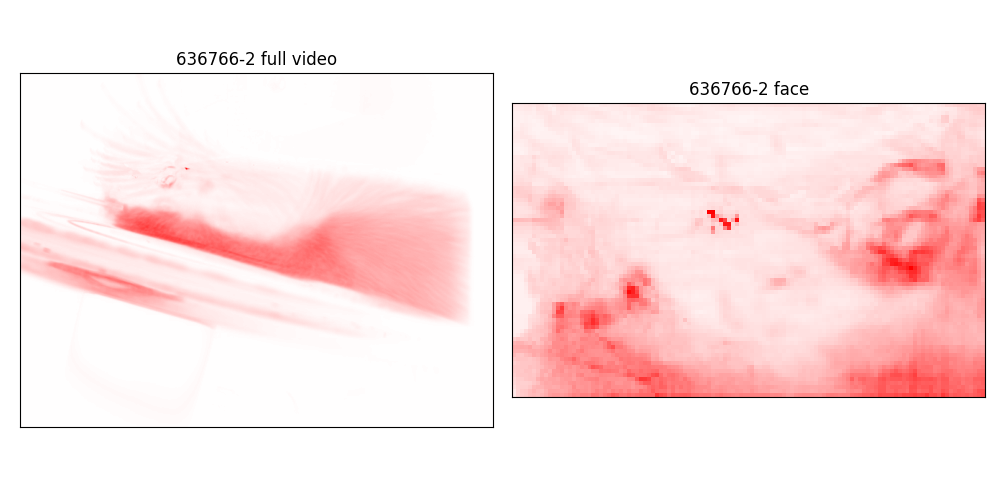

<IPython.core.display.Javascript object>


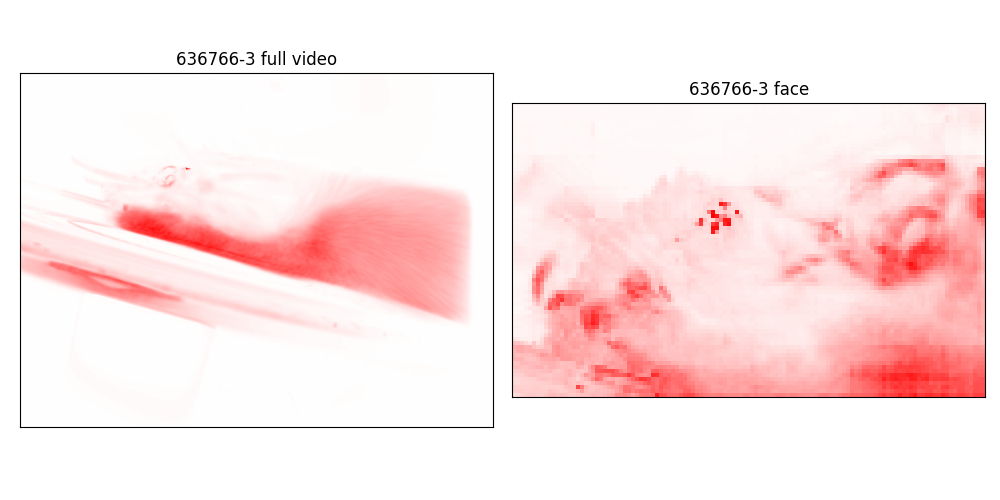

<IPython.core.display.Javascript object>


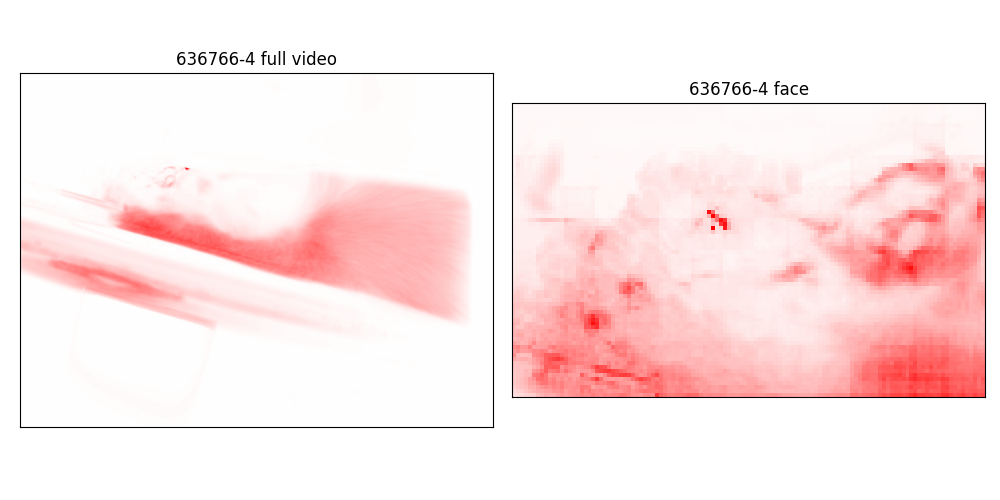

<IPython.core.display.Javascript object>


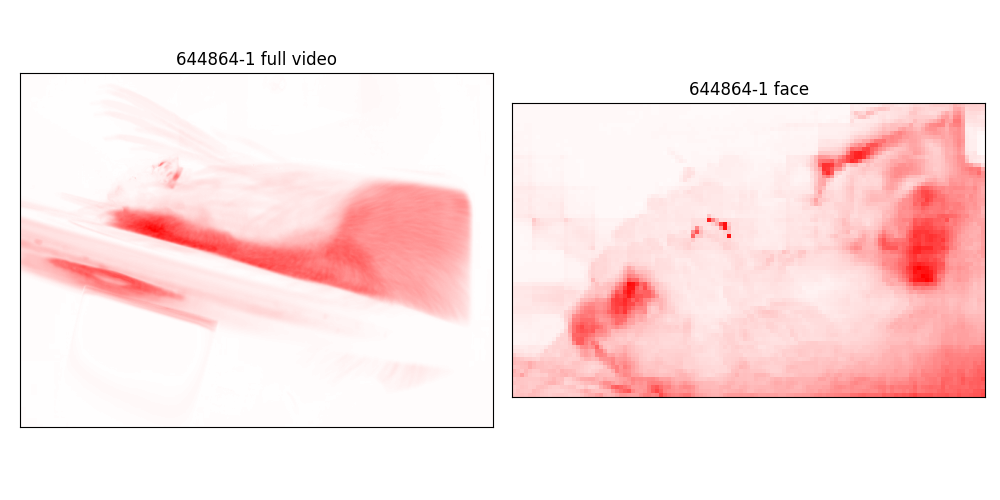

<IPython.core.display.Javascript object>


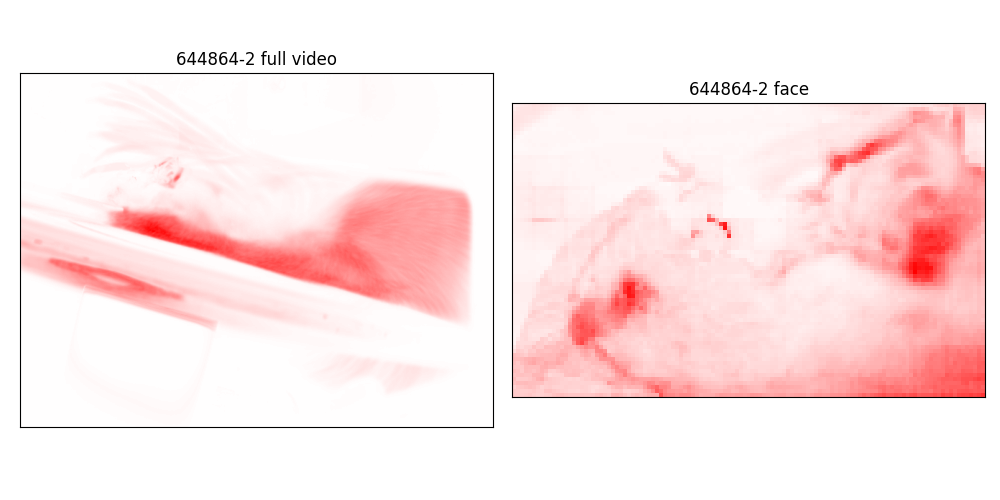

<IPython.core.display.Javascript object>


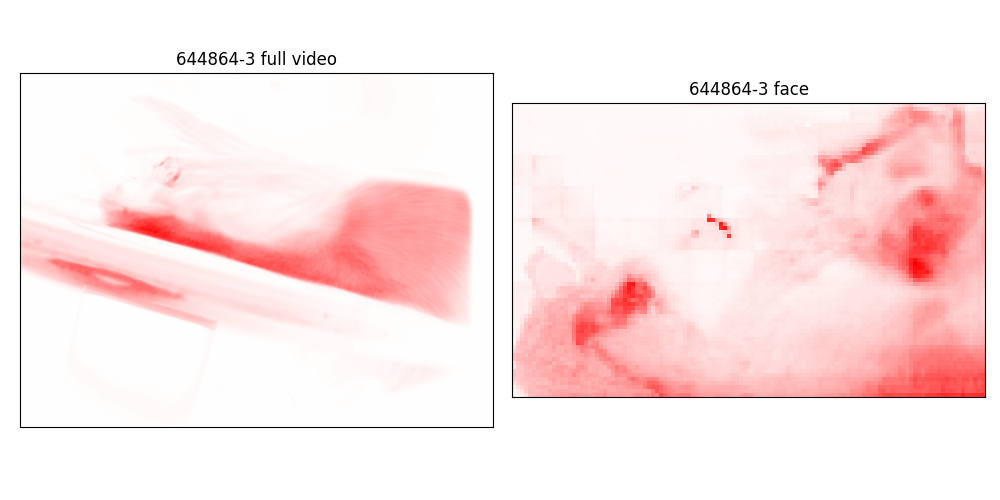

<IPython.core.display.Javascript object>


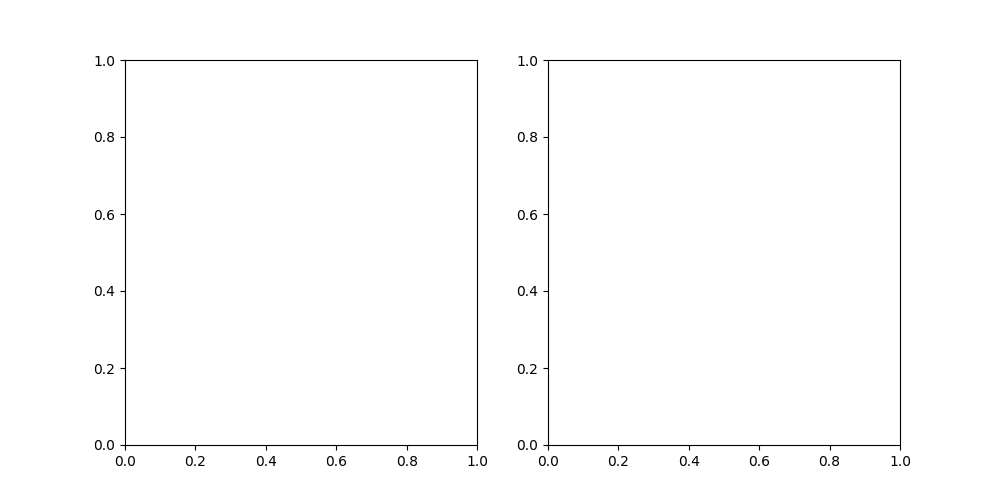

<IPython.core.display.Javascript object>


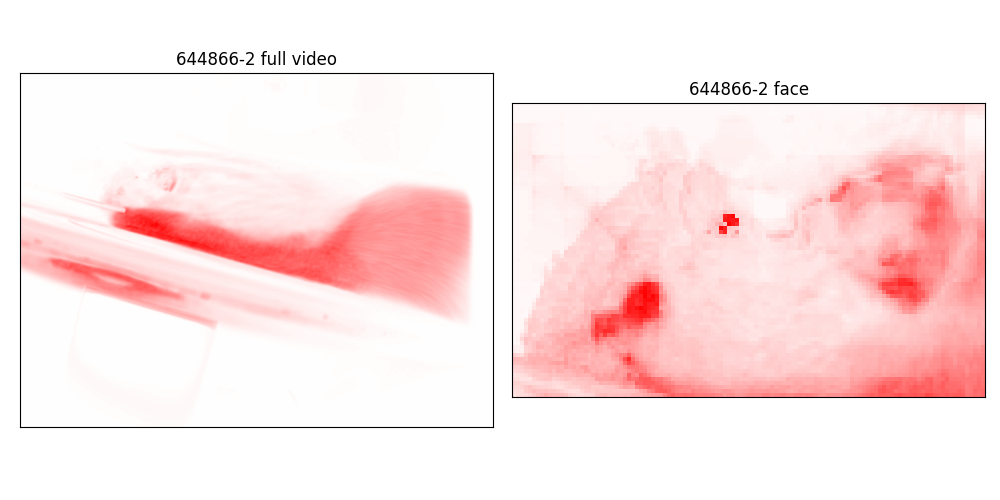

<IPython.core.display.Javascript object>


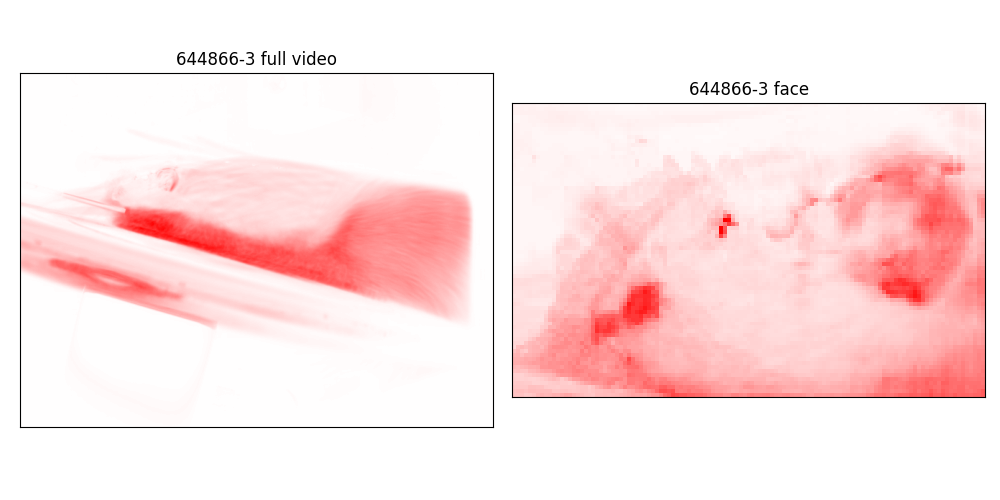

<IPython.core.display.Javascript object>


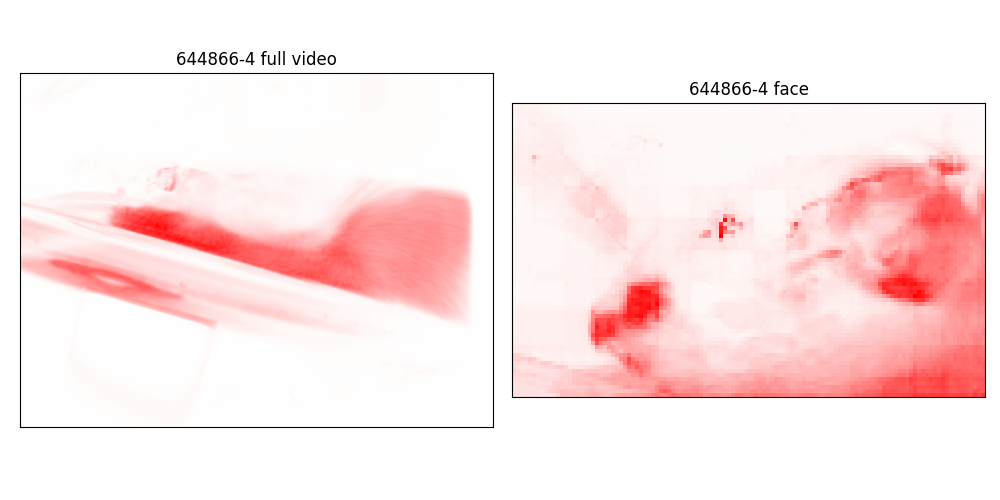

<IPython.core.display.Javascript object>


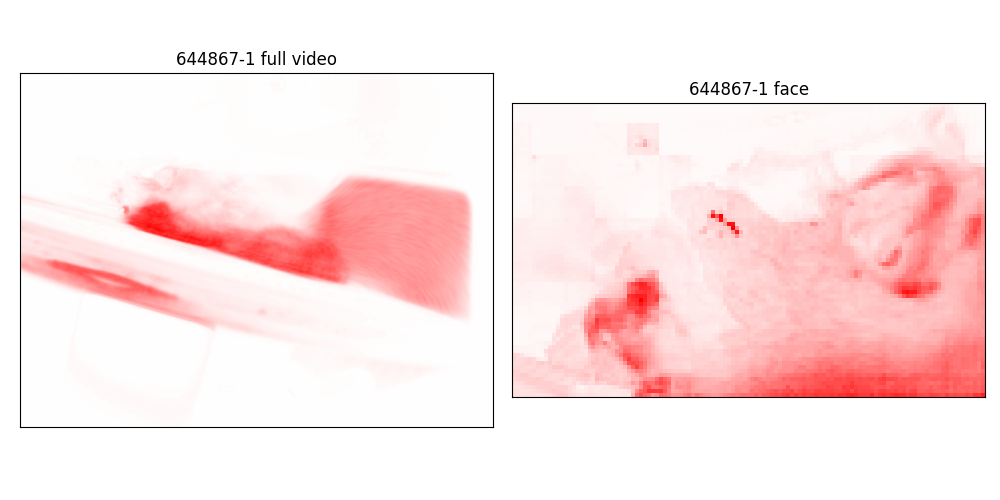

<IPython.core.display.Javascript object>


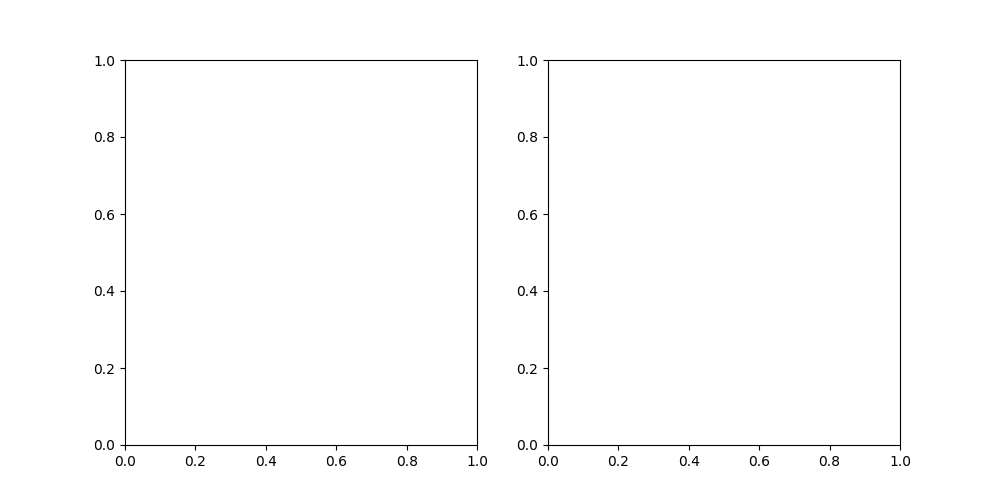

<IPython.core.display.Javascript object>


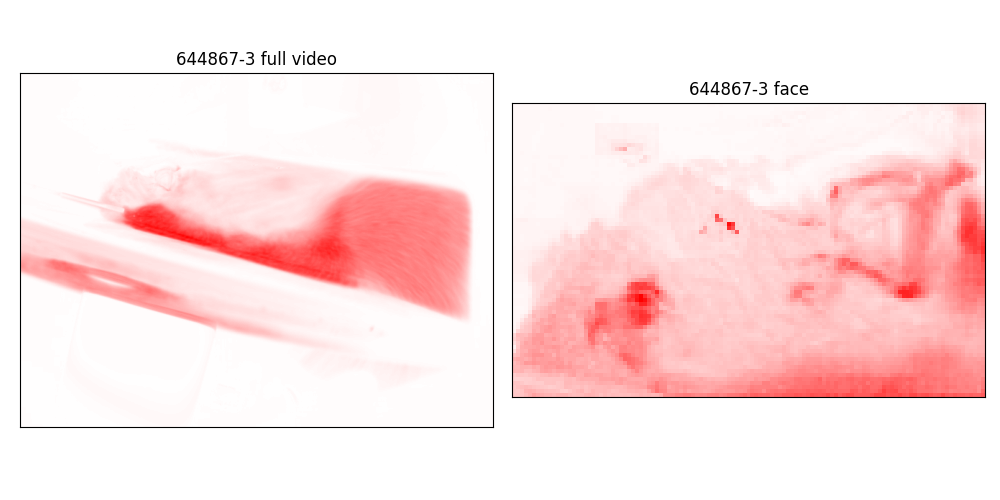

<IPython.core.display.Javascript object>


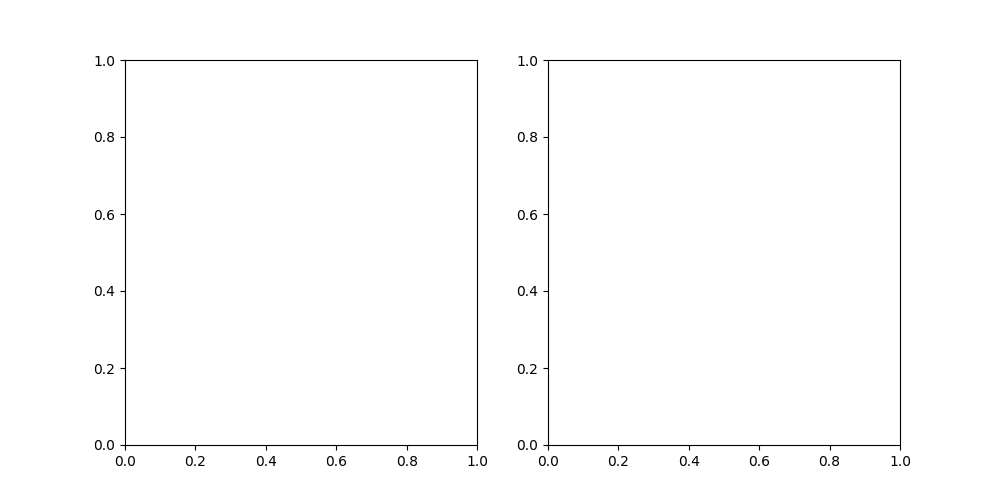

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_22856\761014562.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots(1,2,figsize=(10,5))


<IPython.core.display.Javascript object>


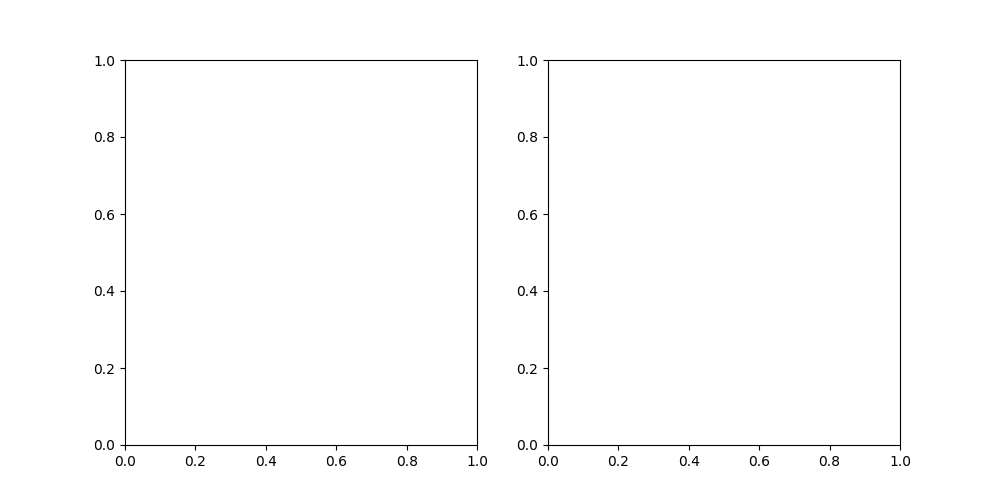

<IPython.core.display.Javascript object>


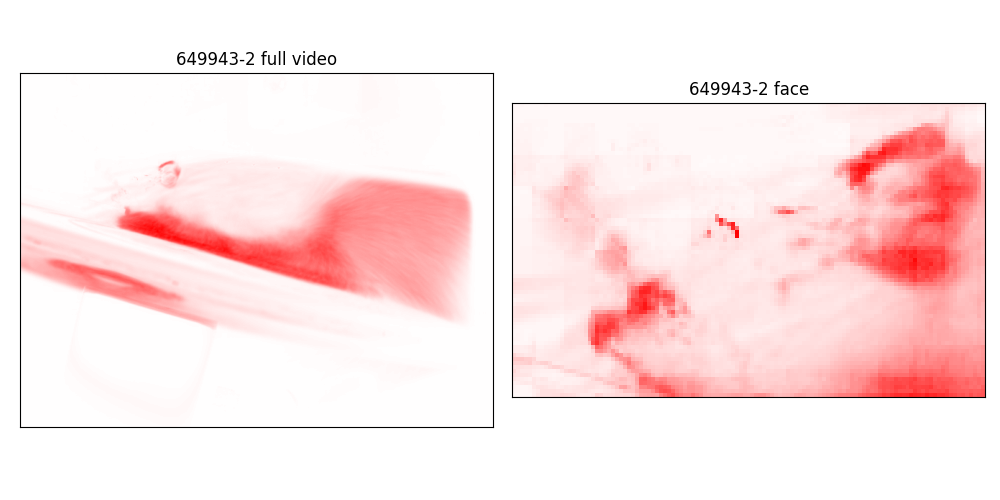

<IPython.core.display.Javascript object>


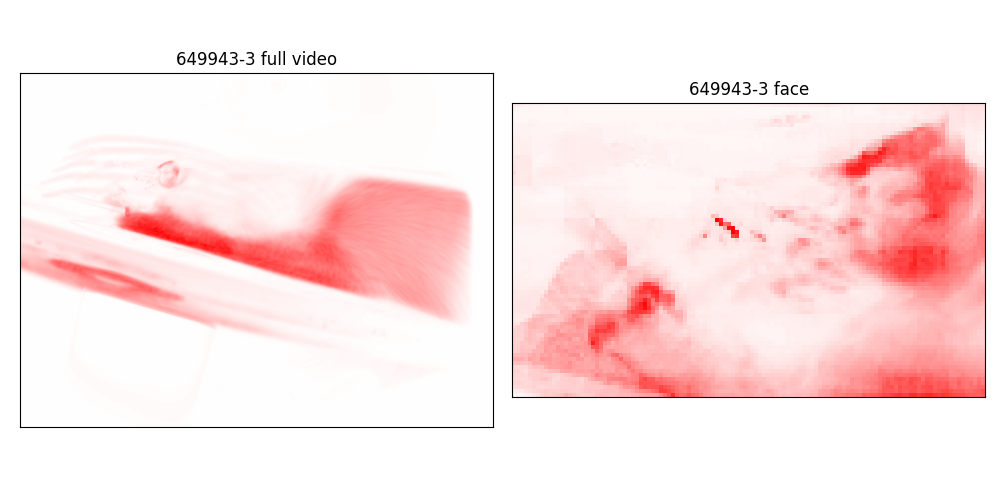

<IPython.core.display.Javascript object>


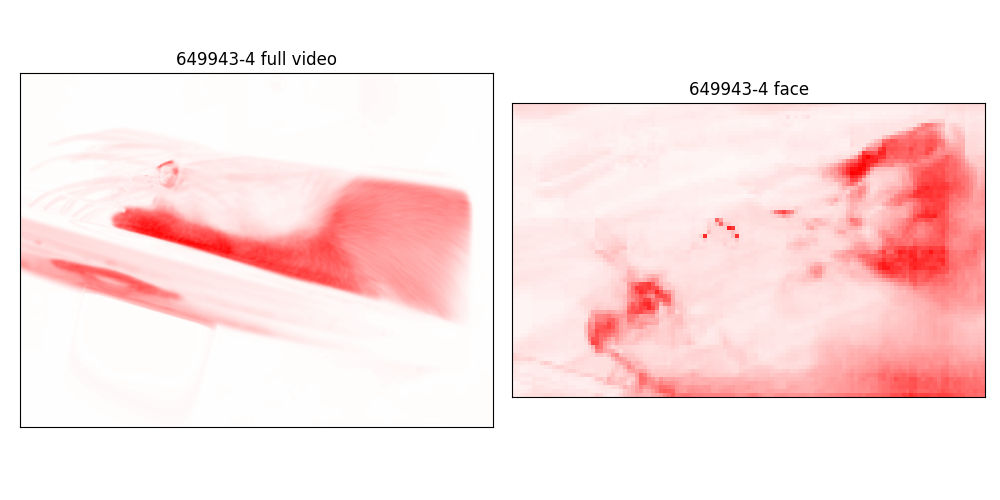

In [54]:
# roi=0 #0 is full video

roi_labels=['full video','face']

save_path=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2023-10-12-weighted-by-component-importance"

#for each session:
for ss,path in enumerate(main_paths[:]):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    
    #load feature importance
    if 0 in svc_results_face[ss][0]['block_ids'][0][0]:
        #average coefs across 5-fold crossval
        coefs=np.mean(np.vstack(svc_results_face[ss][roi]['block_ids'][0][0][0]['coefs']),axis=0)
    else:
        continue
    
    for roi in [1,0]:
        
        #load facemap results
        multi_ROI_path=r"D:\DR Pilot Data\full_video_multi_ROI"
        _dir,vidfilename=os.path.split(glob.glob(os.path.join(path,"Behavior_*.mp4"))[0])
        behav_path = os.path.join(multi_ROI_path,vidfilename[:-12]+'_trimmed_proc.npy')
        behav_info=np.load(behav_path,allow_pickle=True)
        metadata_path = os.path.join(path,"metadata.pkl")

        with open(metadata_path, 'rb') as handle:
            metadata = pickle.load(handle)

        weighted_mot_masks=np.zeros(behav_info.item()['motMask_reshape'][roi].shape)
        
        #for each SVD component
        for cc,coef in enumerate(coefs):
            #weight motmask by feature importance (coef) (unsigned)
            weighted_mot_masks[:,:,cc]=np.abs(coef*behav_info.item()['motMask_reshape'][roi][:,:,cc])

        maxval=np.max(np.abs(np.nanmean(weighted_mot_masks,axis=2)))

        ax[roi].imshow(np.nanmean(weighted_mot_masks,axis=2),cmap='bwr',vmin=-maxval,vmax=maxval)
        ax[roi].set_title(metadata['mouseID']+'-'+str(metadata['ephys_session_num'])+' '+roi_labels[roi])
        ax[roi].set_xticks([])
        ax[roi].set_yticks([])
    
    fig.tight_layout()
    figname='weighted_by_component_importance_'+str(metadata['mouseID'])+'_'+str(metadata['ephys_session_num'])+'.png'
    plt.savefig(os.path.join(save_path,figname), dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png', transparent=True, bbox_inches='tight', 
                pad_inches=0.1, metadata=None)
        

In [49]:
np.nanmean(weighted_mot_masks,axis=2).shape

(492, 658)

<IPython.core.display.Javascript object>


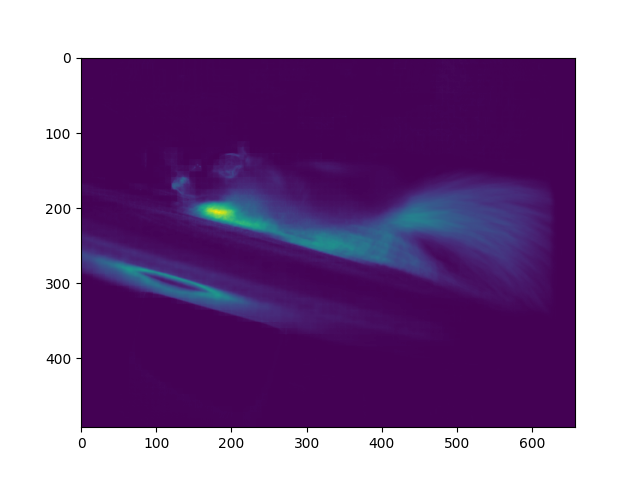

In [42]:
fig,ax=plt.subplots(1,1)
ax.imshow(behav_info.item()['avgmotion_reshape'])

In [47]:
np.min(behav_info.item()['avgmotion_reshape'])

0.0

In [48]:
np.max(behav_info.item()['avgmotion_reshape'])

38.40101

In [45]:
np.min(np.nanmean(weighted_mot_masks,axis=2))

2.2865575525077285e-06

In [46]:
np.max(np.nanmean(weighted_mot_masks,axis=2))

0.0006228349398592172

In [50]:
norm_motion=behav_info.item()['avgmotion_reshape']/np.max(behav_info.item()['avgmotion_reshape'])

In [51]:
norm_weighted_motSVD=np.nanmean(weighted_mot_masks,axis=2)/np.max(np.nanmean(weighted_mot_masks,axis=2))

<IPython.core.display.Javascript object>


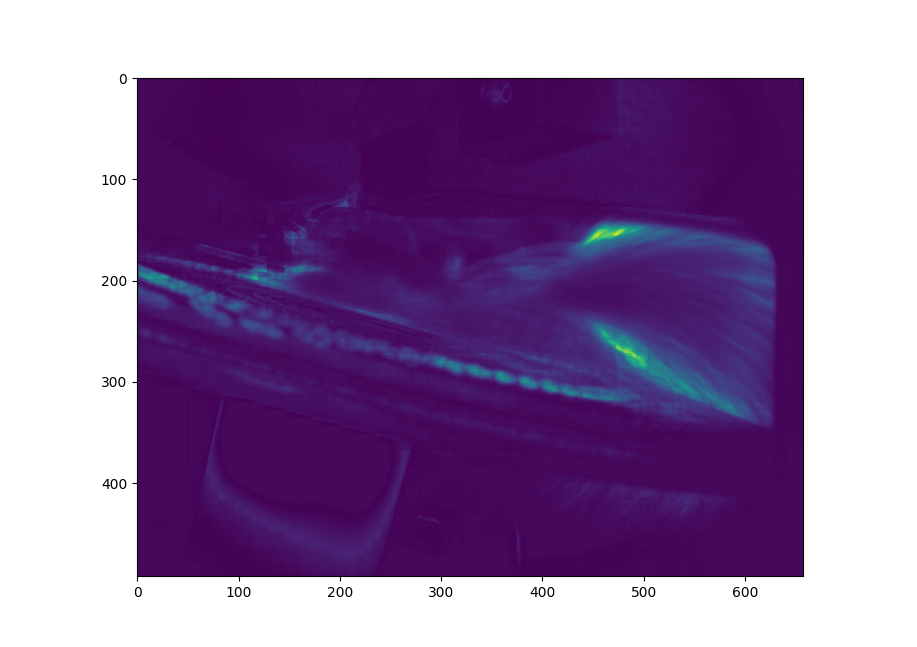

In [52]:
fig,ax=plt.subplots()
ax.imshow(norm_weighted_motSVD/(norm_motion+0.01))

In [ ]:
#overall pixel importance vs. motion energy (ratio?)

